# DSMCER Notebook 7 - Resampling

1. Bootstrapping
    1. Bootstrapping of SML model variance
    2. Bootstrapping to reduce variance ("bagging")
2. Validation
    1. Difference between validation and test set
    2. K-fold cross validation
    3. Leave-one-out

In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn.linear_model
import sklearn.neighbors

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

***
***

<font size=5><center> __We discussed bootstrapping__ where we can create an empirical distribution of any statistic to estimate the population.

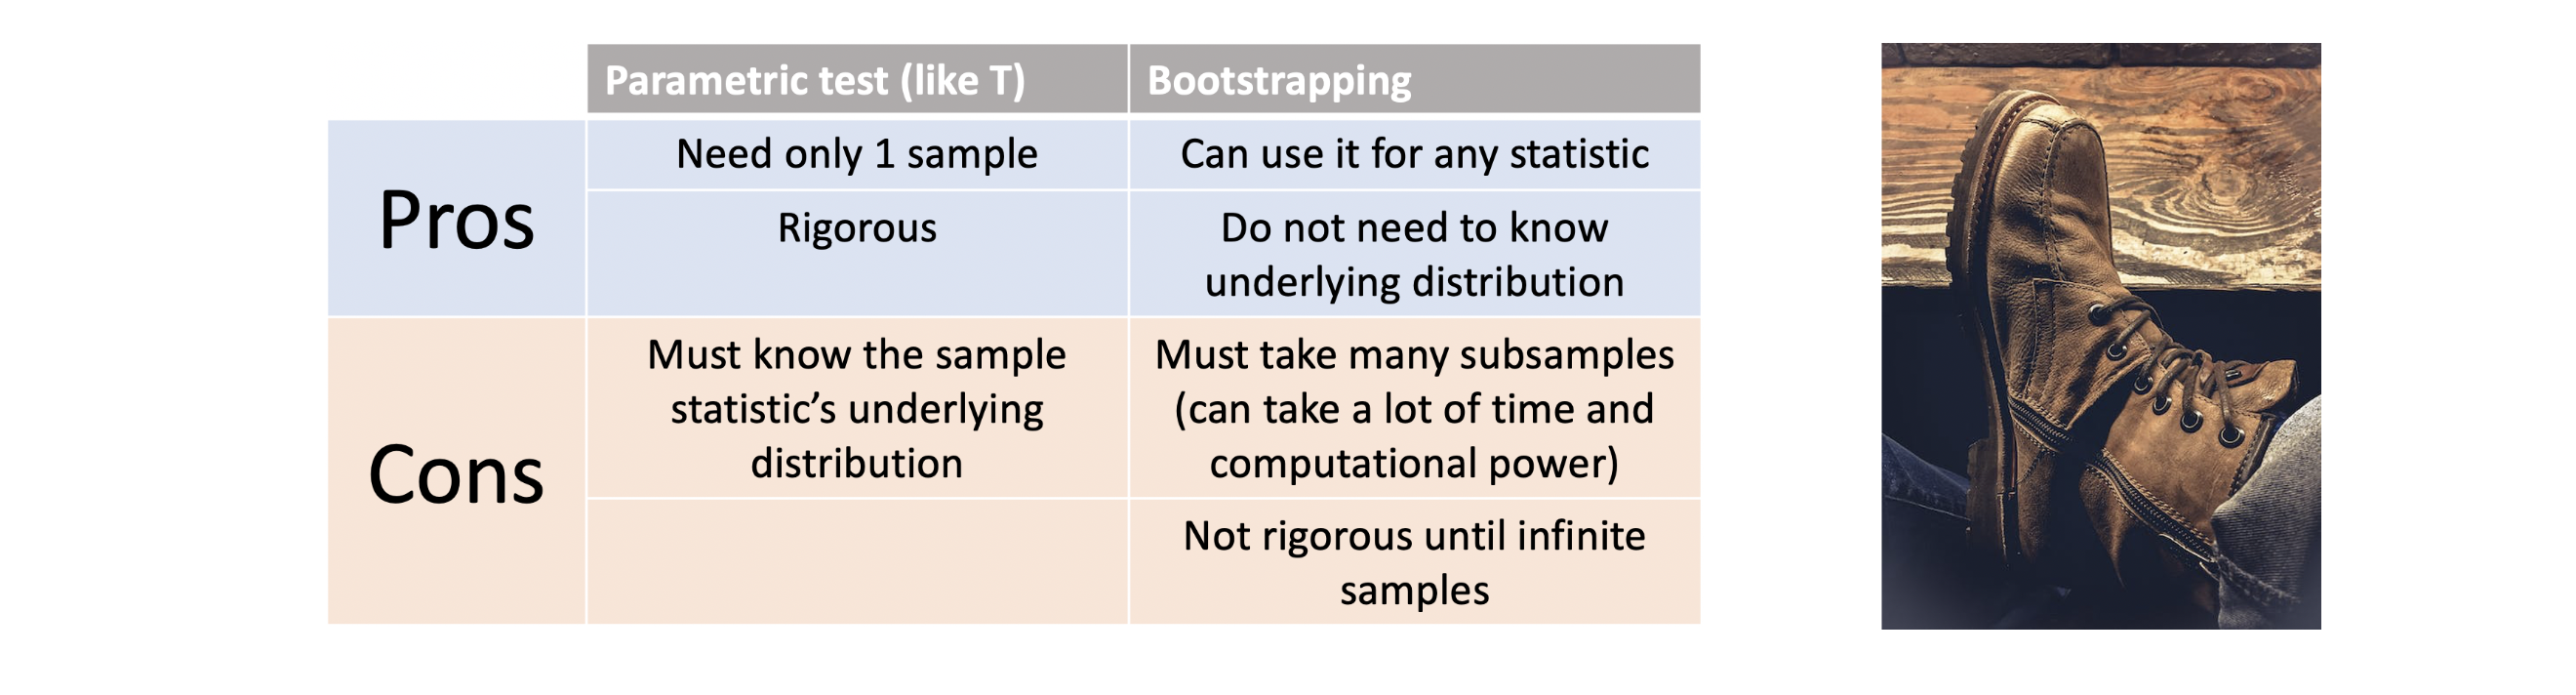

***

<font size=5><center> We have also conducted some supervised machine learning, where we take data that we have and use it to make an estimator of a desired function. __We craft a test set to estimate the generalizability of out model.__

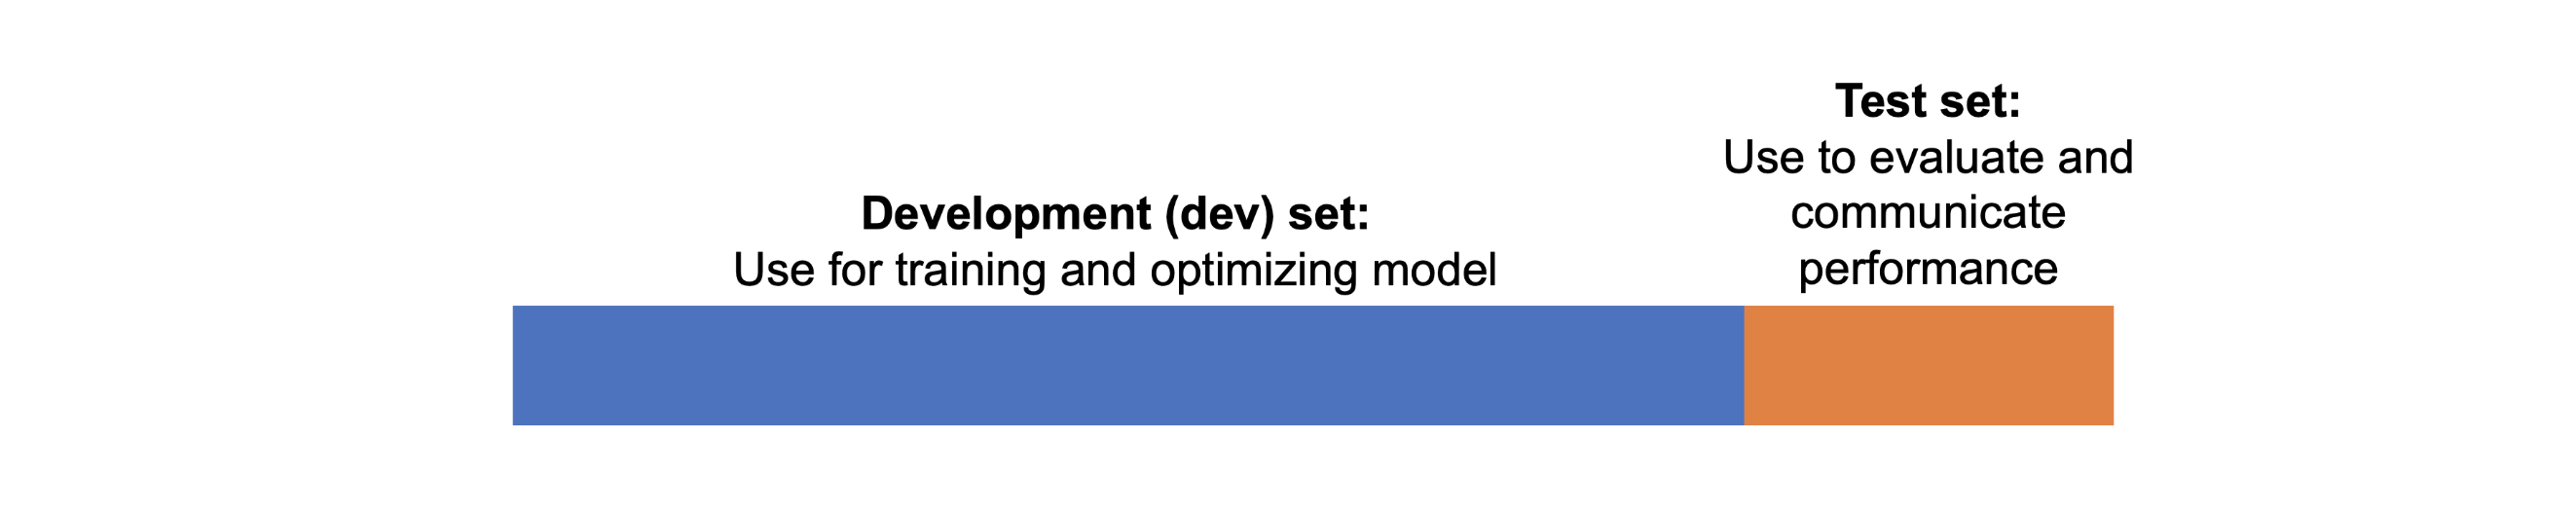

In [4]:
# load the data by downloading it
df = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip').sample(500, random_state=200) # small dataset to make this easier to handle

In [5]:
data = df[['jsc', 'e_lumo_alpha']]

In [6]:
dev, test = sklearn.model_selection.train_test_split(data, test_size=0.15, random_state=1)

<font size=5><center> We discussed the __bias variance tradeoff__, and we sampled our data in different ways to probe the variance:

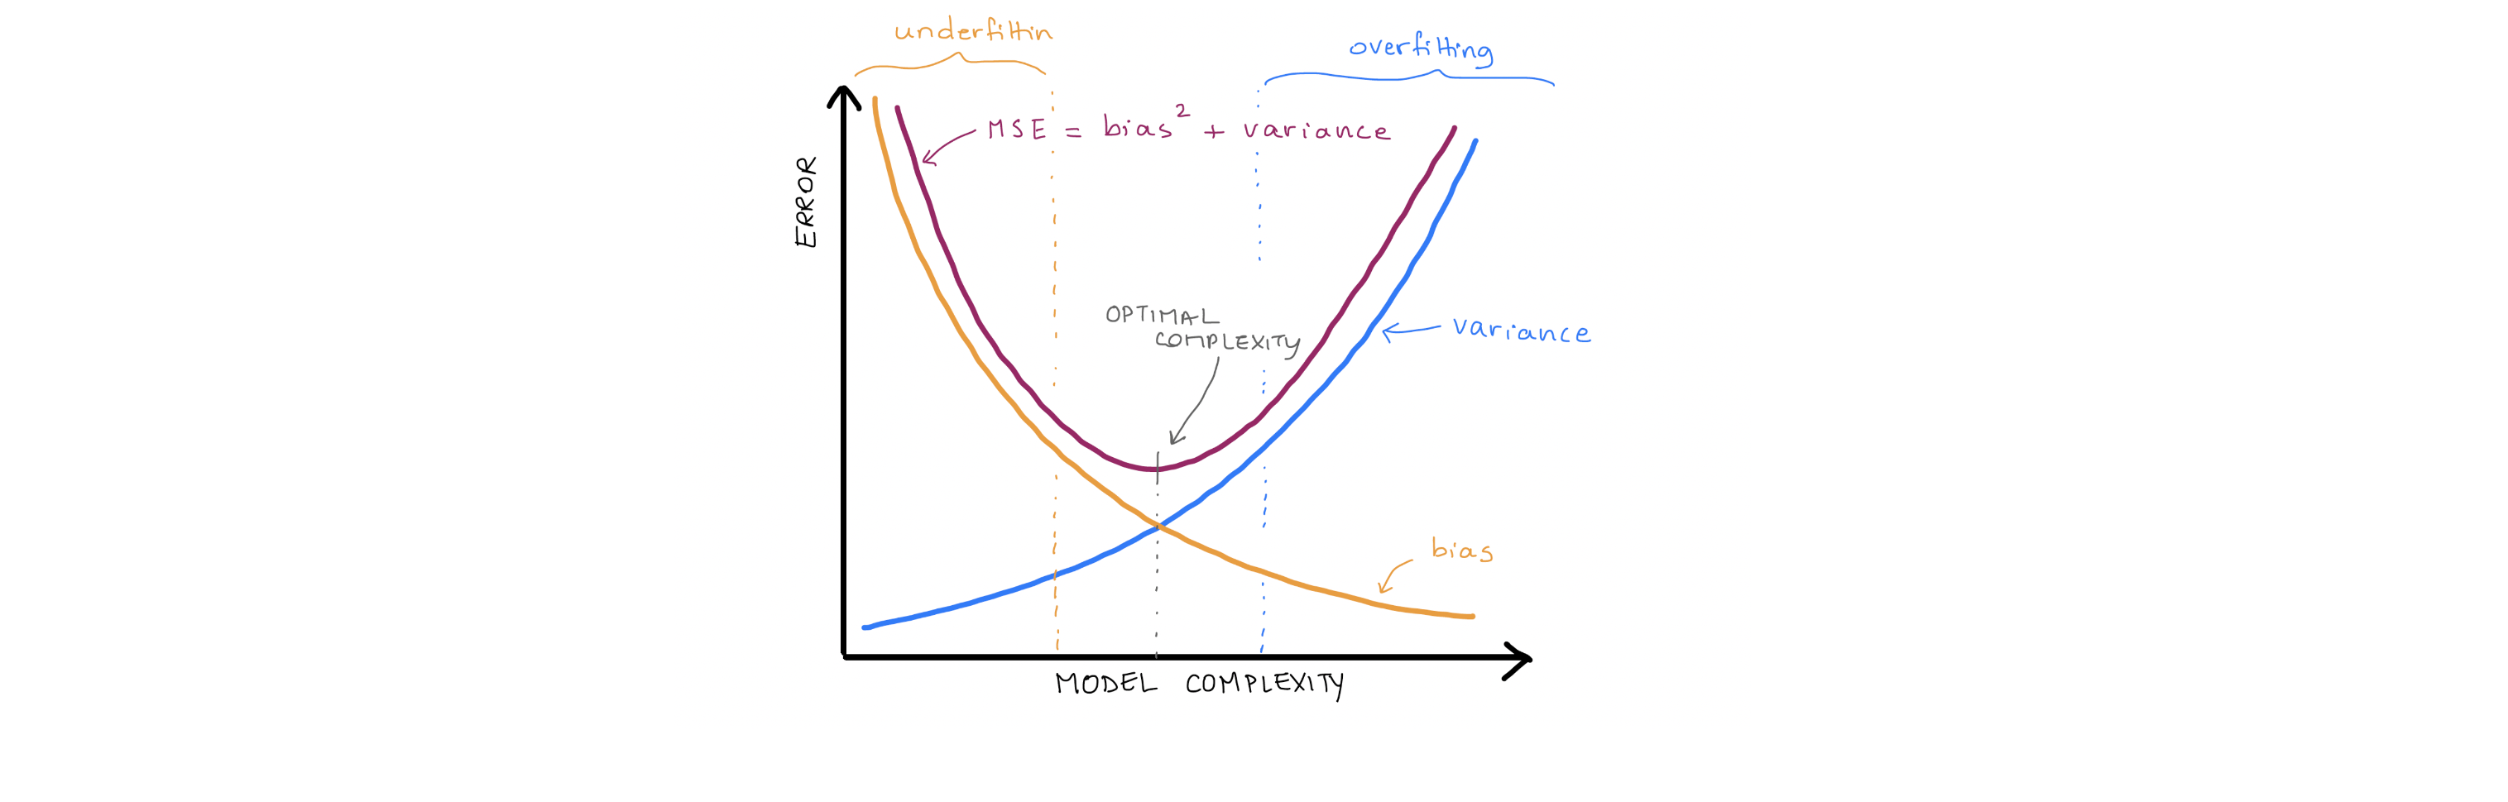

<font size=5><center> In each of the above tasks, we took samples of our dataset. __It is worth rigourously discussing the differences between these__.

***

## 1. Bootstrapping

<font size=4>Bootstrapping is defined by the following characteristics:
    
<font size=4> - We take a large number of samples
    
<font size=4> - We sample with replacement
    
<font size=4> - Each sample size is the original dataset size
    
<font size=5><center> __We do this with the specific goal of estimating the population of any statistic!__

***

### A. Bootstrapping of SML model variance

<font size=4>In the context of SML -  we might use bootstrapping to rigorously estimate the variance of model parameters:

In [53]:
def regression_weight(X_sample, y_sample):
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_sample.reshape(-1,1), y_sample.reshape(-1,1))
    return model.coef_[0][0]

In [54]:
weights = []
for i in range(1000):
    sample = dev.sample(n=len(dev), replace=True)
    
    weights.append(regression_weight(sample['jsc'].values, sample['e_lumo_alpha'].values))

<AxesSubplot: ylabel='Count'>

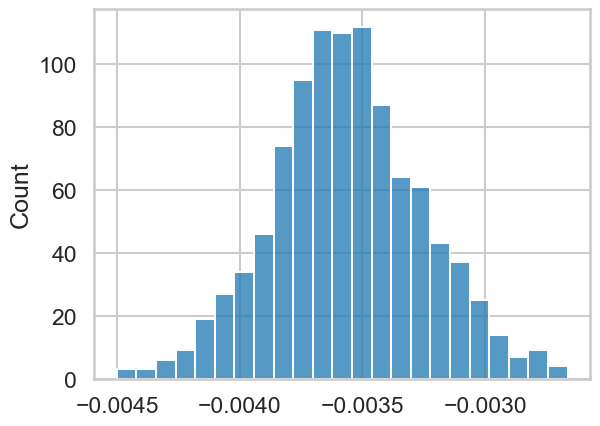

In [56]:
sns.histplot(weights)

<font size=4>Linear regression has very low variance.